"SELECT TOP 1000000 gaia_source.source_id,gaia_source.ra,gaia_source.ra_error, \
                               gaia_source.dec,gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error, \
                               gaia_source.parallax_over_error,gaia_source.phot_g_mean_mag,gaia_source.bp_rp, \
                               gaia_source.radial_velocity,gaia_source.radial_velocity_error, \
                               gaia_source.phot_variable_flag,gaia_source.teff_val,gaia_source.a_g_val \
            FROM gaiadr2.gaia_source \
            WHERE (gaiadr2.gaia_source.ra>=10.56014098062107 AND gaiadr2.gaia_source.ra<=334.56014098062107 \
               AND gaiadr2.gaia_source.dec>=-75.587831532659646 AND gaiadr2.gaia_source.dec<=89.587831532659646 \
               AND gaiadr2.gaia_source.parallax>=11.468624923468156 AND gaiadr2.gaia_source.parallax<=44.068624923468156 \
               AND gaiadr2.gaia_source.parallax_over_error>=1)"
Simbad, Ned, Vizier

In [261]:
# import statements
import matplotlib.pyplot as plot
import numpy as np
from astropy.io.votable import parse_single_table
# Import the units package as "u", the constants package as "c"
import astropy.units as u
import astropy.constants as c
from astropy.table import QTable
import astropy.coordinates as coord
from matplotlib import colors
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from PyAstronomy import pyasl

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from astroquery.gaia import Gaia
from astroquery.simbad import Simbad

from matplotlib import colors

In [268]:
#Querying methods

def read_gaia_vot(filename):
    return QTable(parse_single_table(filename).to_table())

def get_table_gaia_query(myquery):
    return QTable(Gaia.launch_job_async(myquery, dump_to_file = True).get_results())

In [269]:
#Astronomy methods

def luminosityFromMag(magnitude):
    return ((c.L_bol0).value * 10 ** (-0.4 * (magnitude).value))*u.erg

def distance(parallax):
    parallax_arcsec = parallax.to('arcsec').value
    return 1/parallax_arcsec * u.pc

def Magnitude_absolute_from_apparent(mag,dist):
    M = mag - 5*np.log10(dist.to('pc')/u.pc)*u.mag + 5.*u.mag
    return M

def angle_of_star(x,y,z):
    l=np.arctan2(y,x)
    b=np.arctan(z/np.sqrt(x**2+y**2))
    return l,b

In [270]:
a=input()
print(a)

kepler 69c
kepler 69c


In [271]:
result_table = Simbad.query_object(a)
print(result_table)
for row in result_table:
    print(row['RA']+ " " + row['DEC'])
ra, dec = pyasl.coordsSexaToDeg(row['RA']+ " " + row['DEC'])
print(ra, dec)
raminor = np.maximum(ra-350, 1)
ramajor = np.minimum(ra+350, 359)
decminor = np.maximum(dec-170, -89)
decmajor = np.minimum(dec+170, 89)
ragaiaminor = ra-0.0001
ragaiamajor = ra+0.0001
decgaiaminor = dec-0.0001
decgaiamajor = dec+0.0001

 MAIN_ID         RA           DEC      ... COO_WAVELENGTH     COO_BIBCODE    
              "h:m:s"       "d:m:s"    ...                                   
---------- ------------- ------------- ... -------------- -------------------
KOI-172.02 19 33 02.6304 +44 52 08.020 ...              O 2018yCat.1345....0G
19 33 02.6304 +44 52 08.020
293.26096 44.86889444444444


In [272]:
myquery1 = "SELECT TOP 1000000 gaia_source.source_id,gaia_source.ra,gaia_source.ra_error, \
                               gaia_source.dec,gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error, \
                               gaia_source.parallax_over_error,gaia_source.phot_g_mean_mag,gaia_source.bp_rp, \
                               gaia_source.radial_velocity,gaia_source.radial_velocity_error, \
                               gaia_source.phot_variable_flag,gaia_source.teff_val,gaia_source.a_g_val, gaia_source.astrometric_pseudo_colour \
            FROM gaiadr2.gaia_source \
            WHERE (gaiadr2.gaia_source.ra>="+ str(ragaiaminor) + " AND gaiadr2.gaia_source.ra<="+ str(ragaiamajor) +"\
               AND gaiadr2.gaia_source.dec>="+ str(decgaiaminor) +" AND gaiadr2.gaia_source.dec<="+ str(decgaiamajor) +")"

b = get_table_gaia_query(myquery1)

print (b)

for row in b:
    print(row['parallax'])
plx=row['parallax']
print(plx)
plxmajor=(np.minimum((plx.value)+20, 89))
plxminor=(np.maximum((plx.value)-20, 1))
print(plxminor)
print(plxmajor)

     source_id              ra        ... astrometric_pseudo_colour
                           deg        ...           1 / um         
------------------- ----------------- ... -------------------------
2126436800722944000 293.2609013066638 ...        1.5927872098677849
1.3398916644968708 mas
1.3398916644968708 mas
1.0
21.33989166449687


In [273]:
#Getting the stars between 1.4 and 2 parsecs away and ra between 281 and 310, and dec between 35 and 50

myquery2 = "SELECT TOP 1000000 gaia_source.source_id,gaia_source.ra,gaia_source.ra_error, \
                               gaia_source.dec,gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error, \
                               gaia_source.parallax_over_error,gaia_source.phot_g_mean_mag,gaia_source.bp_rp, \
                               gaia_source.radial_velocity,gaia_source.radial_velocity_error, \
                               gaia_source.phot_variable_flag,gaia_source.teff_val,gaia_source.a_g_val, gaia_source.astrometric_pseudo_colour \
            FROM gaiadr2.gaia_source \
            WHERE (gaiadr2.gaia_source.ra>="+ str(raminor) + " AND gaiadr2.gaia_source.ra<="+ str(ramajor) +"\
               AND gaiadr2.gaia_source.dec>="+ str(decminor) +" AND gaiadr2.gaia_source.dec<="+ str(decmajor) +" \
               AND gaiadr2.gaia_source.parallax>="+ str(plxminor) +" AND gaiadr2.gaia_source.parallax<="+ str(plxmajor) +" \
               AND gaiadr2.gaia_source.parallax_over_error>=1)"

p = get_table_gaia_query(myquery2)

p

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,astrometric_pseudo_colour
,deg,mas,deg,mas,mas,mas,,mag,mag,km / s,km / s,,K,mag,1 / um
int64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,object,float32,float32,float64
5867842696999004928,212.72649342427454,0.16654569136256123,-59.05802540463094,0.23051222235236402,1.0000000083512135,0.33775032137096395,2.960767,18.77579689025879,2.7194881439208984,nan,nan,NOT_AVAILABLE,nan,nan,1.2298289430743718
4087148470108071552,286.70097523764156,0.6832211927300303,-18.394426011791992,0.5251599912998292,1.0000000188281026,0.6256130905694118,1.5984321,19.778955459594727,1.5227794647216797,nan,nan,NOT_AVAILABLE,nan,nan,1.6500018658460283
1817165684726221056,306.2463915188333,0.12586646668012103,21.605585677368936,0.1399232199222302,1.0000000341914919,0.16816424902644325,5.9465675,17.437915802001953,1.7741317749023438,nan,nan,NOT_AVAILABLE,nan,nan,1.507187411892185
5312206389985020160,143.46501093802237,0.7195260848050724,-52.495580723300016,0.7715394612829777,1.0000000515892649,0.8540936566925174,1.1708318,20.601932525634766,1.5536975860595703,nan,nan,NOT_AVAILABLE,nan,nan,1.875420935100422
6039135995740281728,243.56294629266733,0.6866554663993056,-28.671862909133143,0.3101998705718258,1.0000000522226185,0.8448436209150945,1.1836511,20.005159378051758,1.1123428344726562,nan,nan,NOT_AVAILABLE,nan,nan,1.473379786847684
4051717807494936704,277.5609064599959,0.07625275866836724,-27.47991797294544,0.0735764418621387,1.0000000523939314,0.09362269885636208,10.681171,15.776820182800293,1.3340778350830078,nan,nan,NOT_AVAILABLE,4572.52490234375,nan,1.4849129925020177
6021361595705122816,245.13450731900335,0.18716159418504832,-37.934294235844185,0.135557127194438,1.0000000524828971,0.21644258641873923,4.620163,18.296247482299805,2.1371383666992188,nan,nan,NOT_AVAILABLE,nan,nan,1.3492460668973207
5909913280341892992,264.1261823364954,0.1906541510608805,-64.01920341266977,0.188885470120395,1.0000000532350783,0.25829038486476885,3.8716116,18.99789047241211,1.7328987121582031,nan,nan,NOT_AVAILABLE,nan,nan,1.2665261583067178


In [274]:
largedistance = distance(p['parallax'])
K2Sky=coord.SkyCoord(ra=p['ra'],dec=p['dec'],distance=largedistance)
K2GC=K2Sky.galactocentric
K2Sky

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(212.72649342, -59.0580254 , 999.99999165),
     (286.70097524, -18.39442601, 999.99998117),
     (306.24639152,  21.60558568, 999.99996581), ...,
     (287.78188266,  -3.02520064, 996.29604906),
     (207.98863403, -69.34713792, 996.29604753),
     (293.26813917,  38.38759738, 996.29604551)]>

In [275]:
#Finding Sky Coordinates of Kepler 452
ra= ra*u.degree
dec= dec*u.degree
distance=distance(plx)
K218b=coord.SkyCoord(ra,dec,distance)
K218b

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (293.26096, 44.86889444, 746.32899547)>

In [276]:
#Converting Kepler 4452 Sky Coordinates into Galactocentric Coordinates
K218bG=K218b.galactocentric
K218bG

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    (-8141.2231231, 712.68187015, 181.58126825)>

In [277]:
#Finding the distances between the x,y,z of the stars in our query and Kepler 452's x,y,z
x=(K2GC.x-K218bG.x)
y=(K2GC.y-K218bG.y)
z=(K2GC.z-K218bG.z)

print(x)
print(y)
print(z)

[522.90062571 772.1727804  287.34153503 ... 677.17875296 452.99325865
 152.12007143] pc
[-1443.43636862  -409.3604813    167.53038105 ...  -180.40745653
 -1489.03520906   221.0129393 ] pc
[-117.5205131  -358.07720882 -316.58086191 ... -257.25245333 -279.7704831
    0.95073897] pc


In [278]:
#Using our method angle_of_star to solve for L,B in Galactic
L,B=angle_of_star(x,y,z)

In [279]:
#Finding the apparent magnitudes of the stars from the neighboring stars
p['Mg'] = Magnitude_absolute_from_apparent(p['phot_g_mean_mag'], largedistance)
p['otherDistance'] = np.sqrt(x.value**2+y.value**2+z.value**2)*u.pc
p['m'] = (p['Mg'].value - 5 + 5*np.log10(p['otherDistance'].value))*u.mag
p['wavelength']=((1/p['astrometric_pseudo_colour'])*1000)*u.nm/u.um
p['wavelength']

<Quantity [813.12121139, 606.05992072, 663.48749473, ..., 685.0822938 ,
           650.83305149, 705.10503567] nm>

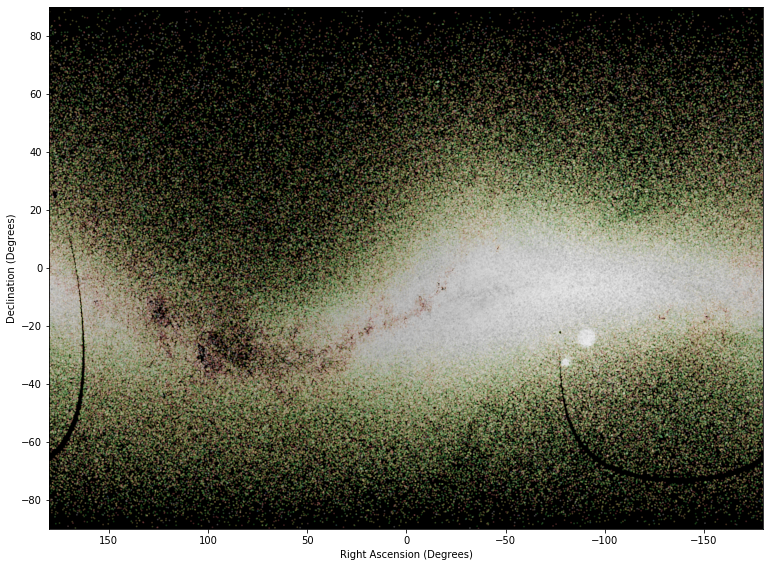

In [280]:
fig = plot.figure(figsize=(12.8, 9.6))
ax = fig.add_subplot(1,1,1)


plot.scatter((L.to('degree')).value, (B.to('degree').value), s = 1, c = (p['wavelength']), alpha = 0.1, cmap = "nipy_spectral")
ax.set_facecolor("Black")
plot.clim(400, 800)

plot.scatter((L.to('degree')).value, (B.to('degree').value), s = 1, c = (p['m']), alpha = 0.1, cmap = "gray")
ax.set_facecolor("Black")

plot.xlabel("Right Ascension (Degrees)")
plot.ylabel("Declination (Degrees)")

plot.xlim(180,-180)
plot.ylim(-90,90)
plot.show()

In [281]:
len(p)

1000000